In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)



### Finished Objectives
Filter the patients using a series of criteria:​

Those who have received opioid prescriptions​

\+ Those who are not cancer patients​

\+ Those who have experienced opioid pain ​

Returned 369 patients in all 20 sample files in CMS​

Get 30 (600 total) random samples from the original CMS dataset. ​

Total runtime around 12 minutes.​

Saved these in separate respective folders, so no need to run it again for now​

​

### Current Objective
Given the CMS dataset, get the significant features from the patients prescribed with opioids and experienced opioid related harm.​

### inp_op and others: collection of patients that experienced opioid harm and prescribed opioids

In [4]:
inp_op = pd.read_csv('./../datasets/cms_processed_full/inpatient_final1.csv')
outp_op = pd.read_csv('./../datasets/cms_processed_full/outpatient_final1.csv')
summ_op = pd.read_csv('./../datasets/cms_processed_full/summary_final1.csv')
presc_op = pd.read_csv('./../datasets/cms_processed_full/prescription_final1.csv')
for i in range(2,21):
    inp_op =inp_op.append(pd.read_csv('./../datasets/cms_processed_full/inpatient_final'+str(i)+'.csv'))
    outp_op =outp_op.append(pd.read_csv('./../datasets/cms_processed_full/outpatient_final'+str(i)+'.csv'))
    summ_op =summ_op.append(pd.read_csv('./../datasets/cms_processed_full/summary_final'+str(i)+'.csv'))
    presc_op =presc_op.append(pd.read_csv('./../datasets/cms_processed_full/prescription_final'+str(i)+'.csv'))
unif_op = inp_op.append(outp_op).reset_index(drop=True)

In [5]:
summ_op
# columns to use from Summary file:
    # convert birth dt to age 
    # sex, race,
    # bene_hi_cvrage (continuous)
        # same normalization as below
    # recode 1,2 coding as 2= 0
    # comorbidity (sp_alzhdmta....strekia)
    # 
    # money reimbursement/payment columns(medreimb_ip....ppymp_car)
        # sum up these columsn to make new column -> - mean (of new col) / divide by standard dev.
    

# sklearn, for logistic regression model 
# use the summary file for now, add icd later once it gets working.

# https://www.statsmodels.org/dev/index.html

# set up github repo
    # add prof. shi, prof helm
    # document the work done to process dataset to create data pipeline
    # 

,Unnamed: 0,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0,3951A55F8A5682D3,19631201,NaN,1,1,0,16,770,12,12,0,12,1,2,2,1,2,1,2,2,2,2,2,0.0,0.0,0.0,100.0,20.0,0.0,650.0,250.0,20.0
1,1,39898ACF8B8DF7BB,19110501,NaN,2,1,0,23,370,12,12,0,12,2,2,2,2,2,1,2,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,530.0,160.0,0.0
2,2,7C7CF7C730043552,19760601,NaN,2,1,0,33,660,3,3,0,3,2,1,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,350.0,80.0,0.0
3,3,800C1A2D55B31C97,19380301,NaN,2,3,0,43,490,12,12,0,12,1,1,2,2,2,1,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,500.0,130.0,0.0
4,4,804A02EA8F3AEF6B,19610101,NaN,1,1,0,39,290,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,730.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,17,AA709202F79B0437,19330801,NaN,1,1,0,44,120,12,12,0,12,2,1,2,2,2,1,1,1,1,1,2,0.0,0.0,0.0,200.0,30.0,0.0,1700.0,450.0,0.0
18,18,C19F7F93AA2C99EC,19320401,NaN,2,1,0,14,190,12,12,0,10,2,1,2,2,2,1,2,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,670.0,220.0,0.0
19,19,C1A97EB06B409A61,19310201,NaN,2,1,0,45,610,12,12,9,12,2,1,2,2,2,1,2,1,2,1,2,0.0,0.0,0.0,260.0,420.0,0.0,970.0,230.0,0.0
20,20,DB1183C366A70E78,19420201,NaN,1,1,0,36,80,12,12,0,12,1,1,1,2,1,1,1,1,1,2,2,21000.0,3072.0,0.0,1320.0,260.0,0.0,5770.0,1280.0,0.0


### the following is the random sample of 30 patients per sample file

In [6]:
inp_rand = pd.read_csv('./../datasets/cms_random/inpatient_final1.csv')
outp_rand = pd.read_csv('./../datasets/cms_random/outpatient_final1.csv')
summ_rand = pd.read_csv('./../datasets/cms_random/summary_final1.csv')
presc_rand = pd.read_csv('./../datasets/cms_random/prescription_final1.csv')
for i in range(2,21):
    inp_rand =inp_rand.append(pd.read_csv('./../datasets/cms_random/inpatient_final'+str(i)+'.csv'))
    outp_rand =outp_rand.append(pd.read_csv('./../datasets/cms_random/outpatient_final'+str(i)+'.csv'))
    summ_rand =summ_rand.append(pd.read_csv('./../datasets/cms_random/summary_final'+str(i)+'.csv'))
    presc_rand =presc_rand.append(pd.read_csv('./../datasets/cms_random/prescription_final'+str(i)+'.csv'))

unif_rand = inp_rand.append(outp_rand).reset_index(drop=True)
unif_rand.groupby('DESYNPUF_ID').agg(sum)
    

,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,HCPCS_CD_45
DESYNPUF_ID,,,,,
01008DD8CD9E480F,8606919972812191,14,281271019.0,281271113.0,0.0
0137DD68EA45D62A,4176811484592490,5,100453777.0,100453777.0,0.0
015985DA70B0BF8D,90252200312577,1,20100418.0,20100418.0,0.0
01C458EFF5E6F490,5424922813180467,10,200856866.0,200856881.0,0.0
025BBC3EE6CBD263,1429873465590496,2,40181920.0,40181931.0,0.0
...,...,...,...,...,...
FC614F5B236E3996,8697244713812499,11,220996678.0,220996759.0,0.0
FD402E20B21D9FE3,1354489062936468,4,80401887.0,80401890.0,0.0
FD932634C6E21BF6,684482269671101,1,20100528.0,20100528.0,0.0


In [7]:
summ_rand



,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,01C458EFF5E6F490,19210201,NaN,2,1,0,39,800,12,12,0,0,2,2,2,2,2,1,2,2,1,2,2,0.0,0.0,0.0,1410.0,190.0,0.0,520.0,160.0,0.0
1,0C017AABACAB9DF5,19320501,NaN,1,1,0,15,160,12,12,0,0,2,1,2,2,2,2,2,2,1,1,2,0.0,0.0,0.0,2610.0,260.0,0.0,1050.0,190.0,10.0
2,138B4952A67C8CB1,19240501,NaN,2,1,0,11,461,12,12,0,12,1,1,2,2,2,2,1,2,2,2,2,0.0,0.0,0.0,20.0,0.0,0.0,1230.0,90.0,0.0
3,218B32C376B73218,19390501,NaN,2,1,0,31,270,12,12,0,0,2,2,2,2,2,1,1,1,2,2,2,0.0,0.0,0.0,910.0,1030.0,0.0,1660.0,360.0,0.0
4,256E8CF2B4A30842,19300801,NaN,2,1,0,32,120,12,12,12,12,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,500.0,60.0,0.0,280.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,EF0E074B9F7625A4,19430201,NaN,1,1,0,49,791,12,12,0,0,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,400.0,200.0,0.0,790.0,150.0,0.0
26,F3B93FD9C345F93A,19551001,NaN,2,1,0,52,120,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,F45B34ED486354E3,19420201,NaN,1,1,0,7,40,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,FD932634C6E21BF6,19330701,NaN,2,3,0,23,200,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,320.0,90.0,0.0


In [8]:
from collections import Counter
Counter(summ_op['BENE_SEX_IDENT_CD']), Counter(summ_rand.BENE_SEX_IDENT_CD)

(Counter({1: 138, 2: 231}), Counter({2: 340, 1: 260}))

In [9]:
icd_table = pd.read_csv('./../datasets/icdcodesfinal.csv')
icd_table
icd_dict = dict(icd_table.values)

In [10]:
icd_dict

{'0011': 'Cholera due to Vibrio cholerae 01',
 '0019': 'Cholera',
 '0020': 'Typhoid fever',
 '0021': 'Paratyphoid fever A',
 '0022': 'Paratyphoid fever B',
 '0023': 'Paratyphoid fever C',
 '0029': 'Paratyphoid fever',
 '0030': 'Salmonella enteritis',
 '0031': 'Salmonella sepsis',
 '00320': 'Localized salmonella infection',
 '00321': 'Salmonella meningitis',
 '00322': 'Salmonella pneumonia',
 '00323': 'Salmonella arthritis',
 '00324': 'Salmonella osteomyelitis',
 '00329': 'Salmonella with other localized infection',
 '0038': 'Other specified salmonella infections',
 '0039': 'Salmonella infection',
 '0040': 'Shigellosis due to Shigella dysenteriae',
 '0041': 'Shigellosis due to Shigella flexneri',
 '0042': 'Shigellosis due to Shigella boydii',
 '0043': 'Shigellosis due to Shigella sonnei',
 '0048': 'Other shigellosis',
 '0049': 'Shigellosis',
 '0050': 'Foodborne staphylococcal intoxication',
 '0051': 'Botulism food poisoning',
 '0052': 'Foodborne Clostridium perfringens [Clostridium welc

In [11]:
from itertools import count
import numpy as np

# collect the icd9 codes from the inpatient/outpatient unified file
full_icd_op = []
full_icd_rand = []
for i in range(1,10 ):
    full_icd_op = full_icd_op + list(unif_op['ICD9_DGNS_CD_'+str(i)])
    full_icd_rand = full_icd_rand + list(unif_rand['ICD9_DGNS_CD_'+str(i)])

# Counter(full_icd_op).most_common(10), Counter(full_icd_rand).most_common(10)
counter_op = Counter(full_icd_op)
counter_rand = Counter(full_icd_rand)
del counter_op[np.nan]
del counter_rand[np.nan]
del counter_op['OTHER']
del counter_rand['OTHER']


n = 100
common_op, common_rand = counter_op.most_common( n), counter_rand.most_common(n)

op_icd_size, rand_icd_size = (sum(counter_op.values()), sum(counter_rand.values()))
for i in range(0,n):
    print(i)
    print(common_op[i], icd_dict[common_op[i][0]], common_op[i][1]/op_icd_size)
    print(common_rand[i],icd_dict[str(common_rand[i][0])], common_rand[i][1]/rand_icd_size)
    

0
('4019', 803) Essential (primary) hypertension 0.037818490086186596
('4019', 543) Essential (primary) hypertension 0.03560422267392302
1
('25000', 425) Type 2 diabetes mellitus without complications 0.020016012810248198
('25000', 273) Type 2 diabetes mellitus without complications 0.017900465543243066
2
('2724', 371) Hyperlipidemia 0.01747280177082843
('2724', 263) Hyperlipidemia 0.017244770834699365
3
('V5869', 249) Long term (current) use of opiate analgesic 0.011727028681768944
('V5869', 225) Long term (current) use of opiate analgesic 0.014753130942233296
4
('42731', 216) Unspecified atrial fibrillation 0.010172844157679084
('4011', 189) Essential (primary) hypertension 0.01239262999147597
5
('4280', 216) Heart failure 0.010172844157679084
('V5861', 173) Long term (current) use of anticoagulants 0.011343518457806045
6
('4011', 216) Essential (primary) hypertension 0.010172844157679084
('2449', 152) Hypothyroidism 0.009966559569864272
7
('2449', 207) Hypothyroidism 0.0097489756511

In [12]:
# counter_rand.values()

In [13]:
# len(counter_rand)
counter_rand.most_common(4000)[3000]

('38089', 1)

In [14]:
# given n most common icd codes in opioid patients, compare the incidence percentage difference with the random sample. 

n = 30
common_op = counter_op.most_common( n)
# common_rand = counter_rand.most_common(n)
feature_df = pd.DataFrame({'ICD_CODE':[],
                            'ICD_DESC':[],
                            'HARM_SAMPLE_PCT':[],
                            'RAND_SAMPLE_PCT':[],
                            'RELATIVE_DIFF':[]})
op_icd_size, rand_icd_size = (sum(counter_op.values()), sum(counter_rand.values()))
for i in range(0,n):
    print(i)
    op_sample_pct = common_op[i][1]/op_icd_size
    icd_desc =icd_dict[common_op[i][0]]
    print(common_op[i], icd_desc, op_sample_pct)
    random_sample_pct = counter_rand[str(common_op[i][0])]/rand_icd_size
    print('control group:',counter_rand[str(common_op[i][0])],'/',rand_icd_size,random_sample_pct)
    # print('relative differential:', (op_sample_pct/random_sample_pct) - 1, (op_sample_pct -random_sample_pct)/random_sample_pct)
    relative_differential = (op_sample_pct/random_sample_pct) -1
    print('relative differential:', relative_differential)
    # feature_df[icd_desc] = 
    if abs(relative_differential) > 0.3:
        feature_df = feature_df.append({'ICD_CODE':common_op[i][0],
                                'ICD_DESC':icd_desc,
                                'HARM_SAMPLE_PCT':op_sample_pct,
                                'RAND_SAMPLE_PCT':random_sample_pct,
                                'RELATIVE_DIFF':relative_differential}, ignore_index=True)
feature_df

0
('4019', 803) Essential (primary) hypertension 0.037818490086186596
control group: 543 / 15251 0.03560422267392302
relative differential: 0.06219114604867726
1
('25000', 425) Type 2 diabetes mellitus without complications 0.020016012810248198
control group: 273 / 15251 0.017900465543243066
relative differential: 0.11818392442892045
2
('2724', 371) Hyperlipidemia 0.01747280177082843
control group: 263 / 15251 0.017244770834699365
relative differential: 0.01322319318214582
3
('V5869', 249) Long term (current) use of opiate analgesic 0.011727028681768944
control group: 225 / 15251 0.014753130942233296
relative differential: -0.20511593588596377
4
('42731', 216) Unspecified atrial fibrillation 0.010172844157679084
control group: 127 / 15251 0.008327322798505015
relative differential: 0.22162241140758843
5
('4280', 216) Heart failure 0.010172844157679084
control group: 122 / 15251 0.007999475444233165
relative differential: 0.27168890367839116
6
('4011', 216) Essential (primary) hypertens

,ICD_CODE,ICD_DESC,HARM_SAMPLE_PCT,RAND_SAMPLE_PCT,RELATIVE_DIFF
0,28521,Anemia in chronic kidney disease,0.009749,0.005639,0.728856
1,496,Chronic obstructive pulmonary disease,0.009184,0.007016,0.308994
2,E9352,NaN,0.008336,0.000066,126.133566
3,58881,Secondary hyperparathyroidism of renal origin,0.007865,0.004000,0.966408
4,5990,Urinary tract infection,0.007441,0.004655,0.598401
5,2809,Iron deficiency anemia,0.007253,0.004196,0.728334
6,41401,Atherosclerotic heart disease of native corona...,0.007206,0.005377,0.340184
7,3051,Nicotine dependence,0.006641,0.004000,0.660261
8,311,Major depressive disorder,0.006123,0.003672,0.667410
9,5859,Chronic kidney disease,0.004804,0.003147,0.526321


In [15]:
feature_df.to_csv('icd9_incidence_differential.csv',index=False)

In [16]:
counter_rand['4019']

543

In [17]:
# given the summary characteristics, compare the statistics between teh opioid patients and the random sample.
from pickletools import OpcodeInfo


comorbidity_list = ['SP_ALZHDMTA','SP_CHF','SP_CHRNKIDN','SP_CNCR','SP_COPD','SP_DEPRESSN','SP_DIABETES','SP_ISCHMCHT','SP_OSTEOPRS','SP_RA_OA','SP_STRKETIA']
# summ_op[comorbidity_list]
print(' 1= yes, 2 = no ')
copd_op_counter, copd_rand_counter = Counter(summ_op['SP_COPD']), Counter(summ_rand['SP_COPD'])
# sum(summ_op['SP_COPD'].values())
# summ_feat_df = pd.DataFrame({'COMORBIDITY':[],
#                             'HARM_PCT'})
summ_feat_df = pd.DataFrame({'COMORBIDITY':[],
                            'HARM_SAMPLE_PCT':[],
                            'RAND_SAMPLE_PCT':[],
                            'RELATIVE_DIFF':[]})
summ_op_size, summ_rand_size = sum(copd_op_counter.values()), sum(copd_rand_counter.values())
for cond in comorbidity_list:
    print(cond)
    op_cond = Counter(summ_op[cond])
    rand_cond = Counter(summ_rand[cond])
    print(op_cond,rand_cond)
    op_cond_pct, random_cond_pct = (op_cond[1]/ summ_op_size,rand_cond[1]/summ_rand_size)
    print(op_cond_pct, random_cond_pct)
    relative_differential = (op_cond_pct/random_cond_pct) -1
    print(relative_differential)
    # if abs(relative_differential) > 0.4:

    if abs(relative_differential) > 0.3:
        summ_feat_df = summ_feat_df.append({'COMORBIDITY':cond,
                                'HARM_SAMPLE_PCT':op_cond_pct,
                                'RAND_SAMPLE_PCT':random_cond_pct,
                                'RELATIVE_DIFF':relative_differential}, ignore_index=True)
summ_feat_df


    


 1= yes, 2 = no 
SP_ALZHDMTA
Counter({2: 230, 1: 139}) Counter({2: 481, 1: 119})
0.37669376693766937 0.19833333333333333
0.8992963038874087
SP_CHF
Counter({1: 208, 2: 161}) Counter({2: 427, 1: 173})
0.5636856368563685 0.28833333333333333
0.9549790873631279
SP_CHRNKIDN
Counter({2: 229, 1: 140}) Counter({2: 509, 1: 91})
0.3794037940379404 0.15166666666666667
1.5015634771732334
SP_CNCR
Counter({2: 345, 1: 24}) Counter({2: 573, 1: 27})
0.06504065040650407 0.045
0.4453477868112017
SP_COPD
Counter({2: 231, 1: 138}) Counter({2: 525, 1: 75})
0.37398373983739835 0.125
1.9918699186991868
SP_DEPRESSN
Counter({1: 192, 2: 177}) Counter({2: 483, 1: 117})
0.5203252032520326 0.195
1.6683343756514488
SP_DIABETES
Counter({1: 253, 2: 116}) Counter({2: 385, 1: 215})
0.6856368563685636 0.35833333333333334
0.9134051805634333
SP_ISCHMCHT
Counter({1: 258, 2: 111}) Counter({2: 352, 1: 248})
0.6991869918699187 0.41333333333333333
0.6915814319433518
SP_OSTEOPRS
Counter({2: 268, 1: 101}) Counter({2: 508, 1: 92})


,COMORBIDITY,HARM_SAMPLE_PCT,RAND_SAMPLE_PCT,RELATIVE_DIFF
0,SP_ALZHDMTA,0.376694,0.198333,0.899296
1,SP_CHF,0.563686,0.288333,0.954979
2,SP_CHRNKIDN,0.379404,0.151667,1.501563
3,SP_CNCR,0.065041,0.045000,0.445348
4,SP_COPD,0.373984,0.125000,1.991870
5,SP_DEPRESSN,0.520325,0.195000,1.668334
6,SP_DIABETES,0.685637,0.358333,0.913405
7,SP_ISCHMCHT,0.699187,0.413333,0.691581
8,SP_OSTEOPRS,0.273713,0.153333,0.785083
9,SP_RA_OA,0.257453,0.160000,0.609079


In [18]:
summ_feat_df.to_csv('summ_feat_df.csv',index=False)

In [19]:
summ_op['SP_COPD']

0     2
1     2
2     2
3     2
4     2
     ..
17    2
18    2
19    2
20    1
21    2
Name: SP_COPD, Length: 369, dtype: int64

### Objective: 9/20
Convert 

In [20]:
inp_op_grouped = inp_op.groupby('DESYNPUF_ID').agg(list).reset_index()
inp_op_grouped

,DESYNPUF_ID,Unnamed: 0,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,01E3ACD77B1FB9E2,[0],[338181165512728],[1],[20100502.0],[20100504.0],[4508MT],[34839],[5715],[2724],[2859],[7262],[E9352],[5849],[4019],[496],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
1,036E0C0CCEC32FF1,"[1, 2, 3]","[338681165489773, 338211165477618, 33891116551...","[1, 1, 1]","[20080102.0, 20080530.0, 20081120.0]","[20080206.0, 20080616.0, 20081124.0]","[2200BA, 2200BA, 2201YM]","[430, 51884, 49121]","[1618, 25000, E9320]","[4538, 5771, V854]","[4846, 261, V1254]","[5119, 96509, 27903]","[2851, 4293, 23879]","[4260, 42820, 42731]","[34831, 4275, 2768]","[78001, 41071, 4254]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]"
2,038B1A977DCA8EC3,"[0, 1, 2, 3]","[895161123176009, 895181123153399, 89533112317...","[1, 1, 1, 1]","[20090422.0, 20090517.0, 20090807.0, 20090829.0]","[20090426.0, 20090521.0, 20090809.0, 20090910.0]","[0505KQ, 0505KQ, 0505KQ, 0505KQ]","[9694, 2396, 4359, V5789]","[311, 1510, 41401, V5419]","[51881, 1985, 30000, V4589]","[25080, 496, 4019, 3330]","[25002, V4502, 78702, 2860]","[E8583, 2724, 53081, 4241]","[28522, 1629, 2724, 4439]","[E8501, V1011, 7813, 43820]","[34830, 3051, 412, 78959]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]"
3,041C6C47F91B7076,"[4, 5, 6]","[3384611655

In [21]:
inp_op_grouped['ICD_ALL'] = inp_op_grouped['ICD9_DGNS_CD_1']+inp_op_grouped[ 'ICD9_DGNS_CD_2']+inp_op_grouped[ 'ICD9_DGNS_CD_3']+inp_op_grouped[ 'ICD9_DGNS_CD_4']+inp_op_grouped['ICD9_DGNS_CD_5']+inp_op_grouped[ 'ICD9_DGNS_CD_6']+inp_op_grouped[ 'ICD9_DGNS_CD_7']+inp_op_grouped[ 'ICD9_DGNS_CD_8']+inp_op_grouped['ICD9_DGNS_CD_9']+inp_op_grouped[ 'ICD9_DGNS_CD_10']


In [22]:
hi_inc_icd9 = pd.read_csv('./../datasets/icd9_incidence_differential.csv')
hi_inc_icd9 = hi_inc_icd9.query('RELATIVE_DIFF < 10').reset_index(drop=True)

In [23]:
hi_inc_icd9.ICD_CODE

0     28521
1       496
2     58881
3      5990
4      2809
5     41401
6      3051
7       311
8      5859
9      5849
10     5856
11    27651
12    30000
Name: ICD_CODE, dtype: object

### Progress and findings 9/22
Able to format the claims dataset into feedable code

Upon doing an aggregate function on the patient names on the control group, it turns out some patients have not had a claim for inpatient or outpatient.

- This reduced the patient pool to 439. I'm not sure whether I should recalculate the relative differences.

- This seems to be another reason to incorporate carrier claims in the future

Successfully able to train a logistic regression model using the dataset.

- When replacing the comorbidity column values from 2 to 0, the logisticregression accuracy score goes down from 72% to 71% and from 75% to 73% with auto cross validation.

- Not sure how to interpret this, though it may just be a matter of different levels of overfitting. i.e. not very significant

- Would filtering the features for more relatively significant ones help with logistic regression? ie is 30% increase in incidence enough to use as a feature for fitting



In [24]:
# unif_op_grouped['ICD_COUNTER'] 
# unif_op_grouped
# Note to self: this code could be used in place of grep to label patients experiencing opioid harm. But it likely runs slower due to the loop iterating through the dframe.
def label_icd(unif, codes):
    '''
    unif: inpatient+outpatient df which contains ICD9 columns 
    codes: names of ICD9 codes to check for each row
    add a new icd9 column for each code in codes labeling whether the patient had that diagnosis
    '''
    # for x in hi_inc_icd9.ICD_CODE:
    print(list(codes))
    for x in codes:
        # print(x)
        icd_str = 'ICD_'+str(x)
        unif[icd_str] = (unif.ICD9_DGNS_CD_1 == str(x) )|(unif.ICD9_DGNS_CD_2 == str(x) )|(unif.ICD9_DGNS_CD_3 == str(x) )|(unif.ICD9_DGNS_CD_4 == str(x) )|(unif.ICD9_DGNS_CD_5 == str(x) )|(unif.ICD9_DGNS_CD_6 == str(x) )|(unif.ICD9_DGNS_CD_7 == str(x) )|(unif.ICD9_DGNS_CD_8 == str(x) )|(unif.ICD9_DGNS_CD_9 == str(x) )|(unif.ICD9_DGNS_CD_10 == str(x) )
        # convert to binary true/false
        unif[icd_str] = unif[icd_str].astype(int)
    return unif

# for x in hi_inc_icd9.ICD_CODE:
#     print(x)
#     icd_str = 'ICD_'+str(x)
#     unif_op[icd_str] = (unif_op.ICD9_DGNS_CD_1 == str(x) )|(unif_op.ICD9_DGNS_CD_2 == str(x) )|(unif_op.ICD9_DGNS_CD_3 == str(x) )|(unif_op.ICD9_DGNS_CD_4 == str(x) )|(unif_op.ICD9_DGNS_CD_5 == str(x) )|(unif_op.ICD9_DGNS_CD_6 == str(x) )|(unif_op.ICD9_DGNS_CD_7 == str(x) )|(unif_op.ICD9_DGNS_CD_8 == str(x) )|(unif_op.ICD9_DGNS_CD_9 == str(x) )|(unif_op.ICD9_DGNS_CD_10 == str(x) )
#     # convert to binary true/false
#     unif_op[icd_str] = unif_op[icd_str].astype(int)
unif_op = label_icd(unif_op, hi_inc_icd9.ICD_CODE)
unif_op_countergroup = unif_op.groupby('DESYNPUF_ID').agg(sum).reset_index()
cgroup_names = ['DESYNPUF_ID'] + ['ICD_' + x for x in list(hi_inc_icd9.ICD_CODE)]
cgroup_names
unif_op_countergroup[cgroup_names]

unif_rand= label_icd(unif_rand, hi_inc_icd9.ICD_CODE)
unif_rand_countergroup = unif_rand.groupby('DESYNPUF_ID').agg(sum).reset_index()
unif_rand_countergroup = unif_rand_countergroup[cgroup_names]
unif_rand_countergroup

['28521', '496', '58881', '5990', '2809', '41401', '3051', '311', '5859', '5849', '5856', '27651', '30000']
['28521', '496', '58881', '5990', '2809', '41401', '3051', '311', '5859', '5849', '5856', '27651', '30000']


,DESYNPUF_ID,ICD_28521,ICD_496,ICD_58881,ICD_5990,ICD_2809,ICD_41401,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,ICD_30000
0,01008DD8CD9E480F,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0137DD68EA45D62A,0,0,0,0,0,0,0,0,0,0,0,0,0
2,015985DA70B0BF8D,0,0,0,0,0,0,0,0,0,0,0,0,0
3,01C458EFF5E6F490,0,0,0,0,0,0,0,0,0,0,0,0,0
4,025BBC3EE6CBD263,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,FC614F5B236E3996,0,0,0,0,0,0,0,0,0,0,0,1,0
435,FD402E20B21D9FE3,0,0,0,0,0,0,0,0,0,0,0,0,0
436,FD932634C6E21BF6,0,0,0,0,0,0,0,0,0,0,0,0,0
437,FE1D4ED09205AD2C,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
# unif_op.join(unif_op_countergroup[cgroup_names].set_index('DESYNPUF_ID'),on='DESYNPUF_ID')
from datetime import datetime, date
from ipaddress import summarize_address_range
# https://www.geeksforgeeks.org/convert-birth-date-to-age-in-pandas/
def age(born):
    born = datetime.strptime(str(born), "%Y%m%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
def recal_comorbidity(df):
    for co in comorbidity_list:
        df[co] = df[co].replace(2,0)
    return df
summ_op_joined = summ_op.join(unif_op_countergroup[cgroup_names].set_index('DESYNPUF_ID'),on='DESYNPUF_ID')
# summ_op_joined['BENE_AGE'] = 1000 - summ_op_joined['BENE_BIRTH_DT']
summ_op_joined['BENE_AGE'] = summ_op_joined['BENE_BIRTH_DT'].apply(age) - 12
summ_op_joined['TOTAL_PAY_AMT'] = - summ_op_joined['MEDREIMB_IP'] + summ_op_joined['BENRES_IP'] - summ_op_joined['PPPYMT_IP'] - summ_op_joined['MEDREIMB_OP'] + summ_op_joined['BENRES_OP'] - summ_op_joined['PPPYMT_OP'] + summ_op_joined['MEDREIMB_CAR'] - summ_op_joined['BENRES_CAR'] - summ_op_joined['PPPYMT_CAR']
# summ_op_joined
# summ_op_joined.columns
feed_columns = ['DESYNPUF_ID','OPIOID_HARMED', 'BENE_SEX_IDENT_CD', 'BENE_AGE', 'BENE_RACE_CD', 'BENE_ESRD_IND',
'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'ICD_28521',
'ICD_58881', 'ICD_5990', 'ICD_2809', 'ICD_3051', 'ICD_311', 'ICD_5859',
'ICD_5849', 'ICD_5856', 'ICD_27651', 'TOTAL_PAY_AMT']
# feed_columns
summ_op_joined['OPIOID_HARMED'] = 1 
summ_op_joined = summ_op_joined[feed_columns]
summ_op_joined = recal_comorbidity(summ_op_joined)

summ_rand_joined = summ_rand.join(unif_rand_countergroup[cgroup_names].set_index('DESYNPUF_ID'), on='DESYNPUF_ID')
summ_rand_joined['BENE_AGE'] = summ_rand_joined['BENE_BIRTH_DT'].apply(age) - 12
summ_rand_joined['TOTAL_PAY_AMT'] = - summ_rand_joined['MEDREIMB_IP'] + summ_rand_joined['BENRES_IP'] - summ_rand_joined['PPPYMT_IP'] - summ_rand_joined['MEDREIMB_OP'] + summ_rand_joined['BENRES_OP'] - summ_rand_joined['PPPYMT_OP'] + summ_rand_joined['MEDREIMB_CAR'] - summ_rand_joined['BENRES_CAR'] - summ_rand_joined['PPPYMT_CAR']

summ_rand_joined['OPIOID_HARMED'] = 0
summ_rand_joined = summ_rand_joined[feed_columns]
summ_rand_joined = recal_comorbidity(summ_rand_joined)
summ_rand_joined = summ_rand_joined.dropna()

# summ_rand_joined['SP_DEPRESSN'] = summ_rand_joined['SP_DEPRESSN'].replace(2,0)

summ_rand_joined
# Counter(summ_rand_joined.SP_DEPRESSN)

,DESYNPUF_ID,OPIOID_HARMED,BENE_SEX_IDENT_CD,BENE_AGE,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,TOTAL_PAY_AMT
0,01C458EFF5E6F490,0,2,89,1,0,12,12,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-860.0
1,0C017AABACAB9DF5,0,1,78,1,0,12,12,0,0,0,1,0,0,0,0,0,0,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1500.0
2,138B4952A67C8CB1,0,2,86,1,0,12,12,0,12,1,1,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1120.0
3,218B32C376B73218,0,2,71,1,0,12,12,0,0,0,0,0,0,0,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1420.0
4,256E8CF2B4A30842,0,2,80,1,0,12,12,12,12,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,E5753493DCDF3532,0,2,36,2,0,12,12,12,12,1,1,1,0,0,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-220.0
24,ED1CC041280181ED,0,1,84,1,0,12,12,0,0,1,1,0,0,1,1,1,1,0,1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7966.0
25,EF0E074B9F7625A4,0,1,67,1,0,12,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440.0
26,F3B93FD9C345F93A,0,2,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# 808*12

# for tuesday: 
# from locale import normalize


# normalize age and total payment amt 

In [27]:
# rename the Y into 1 (not sure why esrd was the only column that was labeled as 0 and Y)
summ_feed_joined = summ_op_joined.append(summ_rand_joined).reset_index(drop = True)
summ_feed_joined['BENE_ESRD_IND'] = summ_feed_joined['BENE_ESRD_IND'].replace('Y','1')
Counter(summ_feed_joined.BENE_ESRD_IND)


Counter({'0': 626, '1': 119, 0: 63})

In [28]:
summ_feed_joined.to_csv('summ_feed_joined.csv', index= False)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_norm = ['BENE_AGE', 'TOTAL_PAY_AMT','BENE_HI_CVRAGE_TOT_MONS','BENE_SMI_CVRAGE_TOT_MONS','BENE_HMO_CVRAGE_TOT_MONS','PLAN_CVRG_MOS_NUM']

summ_feed_joined[cols_to_norm] = StandardScaler().fit_transform(summ_feed_joined[cols_to_norm])
summ_feed_joined

,DESYNPUF_ID,OPIOID_HARMED,BENE_SEX_IDENT_CD,BENE_AGE,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,TOTAL_PAY_AMT
0,3951A55F8A5682D3,1,1,-2.181851,1,0,0.192998,0.228105,-0.571213,0.618058,1,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.326609
1,39898ACF8B8DF7BB,1,2,1.936068,1,0,0.192998,0.228105,-0.571213,0.618058,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.331567
2,7C7CF7C730043552,1,2,-3.114210,1,0,-4.276697,-3.611656,-0.571213,-1.115938,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324485
3,800C1A2D55B31C97,1,2,-0.161740,3,0,0.192998,0.228105,-0.571213,0.618058,1,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.331567
4,804A02EA8F3AEF6B,1,1,-1.948761,1,0,0.192998,0.228105,-0.571213,0.618058,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,E5753493DCDF3532,0,2,-2.958817,2,0,0.192998,0.228105,1.820186,0.618058,1,1,1,0,0,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289784
804,ED1CC041280181ED,0,1,0.770619,1,0,0.192998,0.228105,-0.571213,-1.693937,1,1,0,0,1,1,1,1,0,1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.258772
805,EF0E074B9F7625A4,0,1,-0.550223,1,0,0.192998,0.228105,-0.571213,-1.693937,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.336524
806,F3B93FD9C345F93A,0,2,-1.560278,1,0,-5.766595,-4.891576,-0.571213,-1.693937,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305364


In [30]:
from copy import deepcopy
rr = deepcopy(feed_columns)
rr.remove('DESYNPUF_ID')
rr.remove('OPIOID_HARMED')
rr
X = summ_feed_joined[rr].to_numpy()
y = summ_feed_joined['OPIOID_HARMED'].to_numpy()
X
# np.shape(X)
print(X)

[[1 -2.181851202026423 1 ... 0.0 0.0 0.32660949495844877]
 [2 1.936068404654033 1 ... 0.0 0.0 0.3315667528172032]
 [2 -3.1142103582559604 1 ... 0.0 0.0 0.3244849558761254]
 ...
 [1 -0.5502226786247328 1 ... 0.0 0.0 0.33652401067595766]
 [2 -1.5602784312067315 1 ... 0.0 0.0 0.30536410413521536]
 [2 0.2267432848998815 3 ... 0.0 0.0 0.3216522370996943]]


In [31]:
summ_feed_joined.to_csv('summ_feed_joined.csv',index=False)

In [32]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import r2_score

# X, y = load_iris(return_X_y=True)
# X, y.size
clf = LogisticRegression(random_state= 0, class_weight="auto")
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))


0.8315338506460236
0.7460074942435073
-0.002574217086134256


In [33]:
clf = LogisticRegressionCV(random_state= 0, class_weight="auto")
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))

0.8269656956250657
0.7457327876240039
-0.0075621485144234946


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier


In [35]:
clf = RandomForestClassifier(max_features=10, max_depth=10, min_samples_leaf=3)
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print('area under the curve:',auc(false_positive_rate, true_positive_rate))
print('receiving operating characteristic auc score:',roc_auc_score(y, clf.predict(X)))
print('r2 score:',r2_score(y, clf.predict(X)))
print('general accuracy:', clf.score(X,y))


area under the curve: 0.957392694655876
receiving operating characteristic auc score: 0.8764993116901556
r2 score: 0.511182720027656
general accuracy: 0.8787128712871287


In [36]:
# https://stackoverflow.com/questions/20463281/how-do-i-solve-overfitting-in-random-forest-of-python-sklearn
clf = GradientBoostingClassifier()
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print('area under the curve:',auc(false_positive_rate, true_positive_rate))
print('receiving operating characteristic auc score:',roc_auc_score(y, clf.predict(X)))
print('r2 score:',r2_score(y, clf.predict(X)))
print('general accuracy:', clf.score(X,y))


area under the curve: 0.9335580371749047
receiving operating characteristic auc score: 0.8452753548036619
r2 score: 0.39147236574871447
general accuracy: 0.849009900990099


Update 9/27
- Restructured GitHub 
    - organized into data analysis, data preparation, raw data, and other bash function calls
    - tried fixing the paths inside the bash files and notebook files. For now analyze_harm.ipynb works again after debug
        - haven't tested all functions or notebooks. data preparation notebook may need checking next
    - update README to include descriptions of each folder
        - still rough draft
- Data analysis
    - study classification scoring methods
        - AUC and ROC_AUC scores, precision (tp/(tp+fp)) and recall (tp/(tp+fn)) scores, harmonic mean(2/(1/prec)+(1/rec)), r2_score, confusion matrix
    - Test different regression methods
        - logistic regression, adaboost have very low r2 scores. 
        - random forest, gradientboostingmachine have higher scores in all fronts
        - decision tree has perfect score; too high of depth and most likely to overfit
    - revisit dataset
        - split by quarter, add more features, include claims dataset, get better sample testing



LogisticRegression(class_weight='auto', random_state=0)


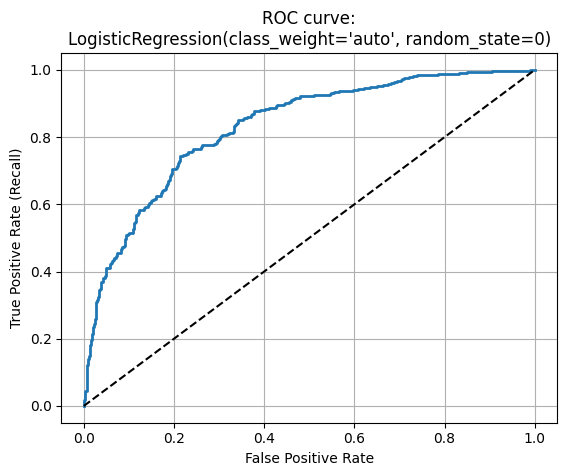

area under the curve: 0.8315338506460236
receiving operating characteristic auc score: 0.7460074942435073
r2 score: -0.002574217086134256
general accuracy: 0.7512376237623762
confusion matrix:
 [[354  85]
 [116 253]]
precision: 0.7485207100591716 recall: 0.6856368563685636 f1(harmonic mean): 0.7157001414427157


LogisticRegressionCV(class_weight='auto', random_state=0)


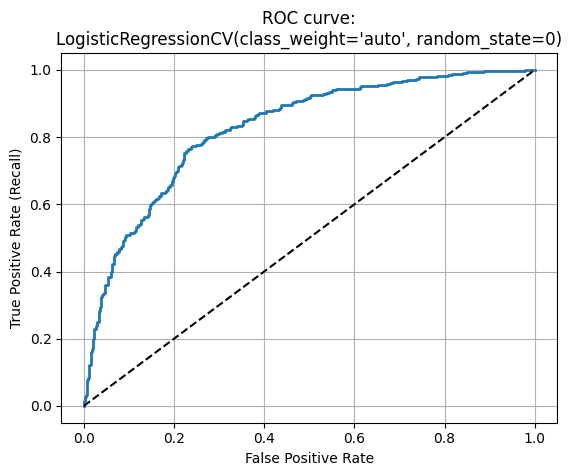

area under the curve: 0.8269656956250657
receiving operating characteristic auc score: 0.7457327876240039
r2 score: -0.0075621485144234946
general accuracy: 0.75
confusion matrix:
 [[349  90]
 [112 257]]
precision: 0.7406340057636888 recall: 0.6964769647696477 f1(harmonic mean): 0.7178770949720671


RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=3)


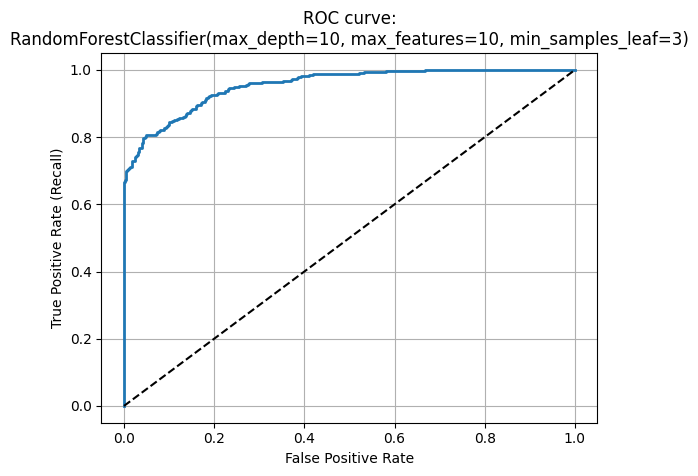

area under the curve: 0.9551765221524652
receiving operating characteristic auc score: 0.8683692303893427
r2 score: 0.48125513145792054
general accuracy: 0.8712871287128713
confusion matrix:
 [[396  43]
 [ 61 308]]
precision: 0.8774928774928775 recall: 0.8346883468834688 f1(harmonic mean): 0.8555555555555556


AdaBoostClassifier()


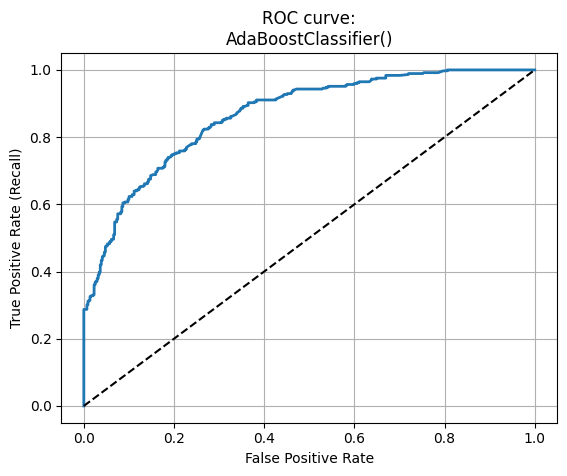

area under the curve: 0.8656499435153805
receiving operating characteristic auc score: 0.7675302948929261
r2 score: 0.08222061719478246
general accuracy: 0.7722772277227723
confusion matrix:
 [[361  78]
 [106 263]]
precision: 0.7712609970674487 recall: 0.7127371273712737 f1(harmonic mean): 0.7408450704225351


DecisionTreeClassifier()


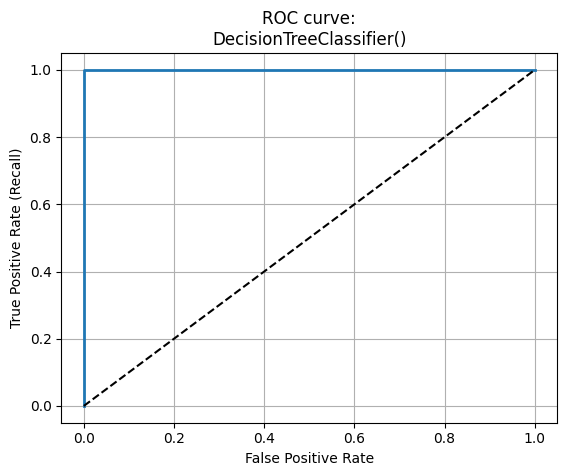

area under the curve: 1.0
receiving operating characteristic auc score: 1.0
r2 score: 1.0
general accuracy: 1.0
confusion matrix:
 [[439   0]
 [  0 369]]
precision: 1.0 recall: 1.0 f1(harmonic mean): 1.0


GradientBoostingClassifier()


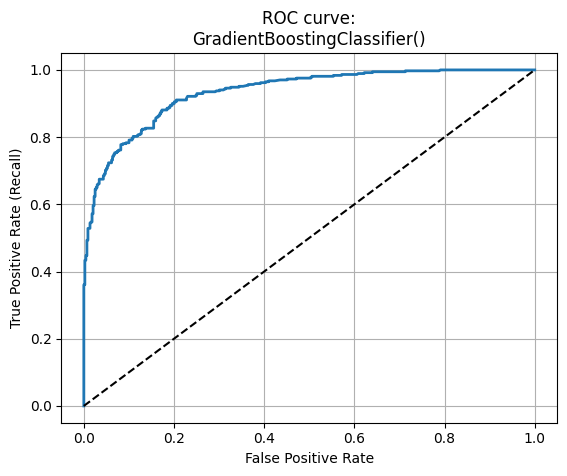

area under the curve: 0.9335580371749047
receiving operating characteristic auc score: 0.8452753548036619
r2 score: 0.39147236574871447
general accuracy: 0.849009900990099
confusion matrix:
 [[390  49]
 [ 73 296]]
precision: 0.8579710144927536 recall: 0.8021680216802168 f1(harmonic mean): 0.8291316526610645


,Name,aoc_score,roc_auc_score,r2_score,accuracy,precision,recall,f1
0,"LogisticRegression(class_weight='auto', random...",0.831534,0.746007,-0.002574,0.751238,0.748521,0.685637,0.715700
1,"LogisticRegressionCV(class_weight='auto', rand...",0.826966,0.745733,-0.007562,0.750000,0.740634,0.696477,0.717877
2,"RandomForestClassifier(max_depth=10, max_featu...",0.955177,0.868369,0.481255,0.871287,0.877493,0.834688,0.855556
3,AdaBoostClassifier(),0.865650,0.767530,0.082221,0.772277,0.771261,0.712737,0.740845
4,DecisionTreeClassifier(),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,GradientBoostingClassifier(),0.933558,0.845275,0.391472,0.849010,0.857971,0.802168,0.829132


In [39]:
# from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()

# fpr,t
# regression comparison
regression_list = [LogisticRegression(random_state= 0, class_weight="auto"),LogisticRegressionCV(random_state= 0, class_weight="auto"),
                RandomForestClassifier(max_features=10, max_depth=10, min_samples_leaf=3),AdaBoostClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier()]

regscores = pd.DataFrame({'Name':[], 'aoc_score':[], 'roc_auc_score':[],'r2_score':[],'accuracy':[], 'precision':[],'recall':[], 'f1':[]})
# regscores.loc[0] = ['b',3,4,1,2]
regscores
i =0 
for clf in regression_list:
    print('\n')
    print(clf)
    clf.fit(X,y)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])

    plot_roc_curve(false_positive_rate, true_positive_rate)
    plt.title('ROC curve:\n'+ str( clf))
    plt.show()
    auc_temp = auc(false_positive_rate, true_positive_rate)
    rocauc_temp = roc_auc_score(y, clf.predict(X))
    r2_temp = r2_score(y, clf.predict(X))
    score_temp = clf.score(X,y)
    print('area under the curve:',auc(false_positive_rate, true_positive_rate))
    print('receiving operating characteristic auc score:',roc_auc_score(y, clf.predict(X)))
    print('r2 score:',r2_score(y, clf.predict(X)))
    print('general accuracy:', clf.score(X,y))

    cmatrix_temp = confusion_matrix(y, clf.predict(X))
    print('confusion matrix:\n', cmatrix_temp)
    prec_temp = precision_score(y, clf.predict(X))
    recall_temp = recall_score(y, clf.predict(X))
    f1_temp = f1_score(y, clf.predict(X))
    print('precision:',prec_temp, 'recall:',recall_temp, 'f1(harmonic mean):',f1_temp)
    regscores.loc[i] = [str(clf),auc_temp,rocauc_temp,r2_temp,score_temp,prec_temp,recall_temp,f1_temp]
    i+=1

regscores

In [ ]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.736075 using {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.5}
0.543318 (0.002803) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.543318 (0.002803) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.543318 (0.002803) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.543724 (0.005242) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.549084 (0.014934) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.605993 (0.037209) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.736065 (0.064449) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.733169 (0.060879) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.726569 (0.062721) with: {'learning_rate': 0.001, 

In [ ]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [4,10,100]
max_features = ['sqrt', 'log2', 10]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.733164 using {'max_features': 'sqrt', 'n_estimators': 100}
0.652752 (0.045726) with: {'max_features': 'sqrt', 'n_estimators': 4}
0.699244 (0.062508) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.733164 (0.054928) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.658426 (0.047951) with: {'max_features': 'log2', 'n_estimators': 4}
0.684434 (0.044295) with: {'max_features': 'log2', 'n_estimators': 10}
0.730689 (0.053492) with: {'max_features': 'log2', 'n_estimators': 100}
0.658457 (0.046644) with: {'max_features': 10, 'n_estimators': 4}
0.705098 (0.057935) with: {'max_features': 10, 'n_estimators': 10}
0.730221 (0.051260) with: {'max_features': 10, 'n_estimators': 100}


In [ ]:
clf = AdaBoostClassifier()
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))
clf.score(X,y)

0.8656499435153805
0.7675302948929261
0.08222061719478246


0.7722772277227723

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

my_base_model= SVR()
clf = AdaBoostRegressor(base_estimator=my_base_model)
clf.fit(X,y)

# false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
# print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))
clf.score(X,y)


0.9919069577939515
0.42113029749920616


0.42113029749920616

In [ ]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))
clf.score(X,y)


0.8231475822730893
0.7400164206653457
0.0024137143421548712


0.7524752475247525

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
clf = GradientBoostingClassifier()
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))
clf.score(X,y)

0.9335580371749047
0.8452753548036619
0.39147236574871447


0.849009900990099

In [ ]:
import math

math.sqrt(.5)


0.7071067811865476

In [ ]:
clf.predict_proba(X)

array([[0.30528418, 0.69471582],
       [0.41324903, 0.58675097],
       [0.22751823, 0.77248177],
       ...,
       [0.91746895, 0.08253105],
       [0.93613121, 0.06386879],
       [0.73563849, 0.26436151]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
clf.predict(X)


array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [ ]:

# clf.predict_proba(X)

clf.score(X,y)

0.849009900990099

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 5, random_state = 0).fit(X,y)
clf.predict(X)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
clf.score(X,y)

0.75

In [ ]:

# Counter(summ_op_joined['BENE_HI_CVRAGE_TOT_MONS']),Counter(summ_op_joined['BENE_HMO_CVRAGE_TOT_MONS']),Counter(summ_op_joined['BENE_HMO_CVRAGE_TOT_MONS'])
# Counter(list(x if str(x) != 'nan' else 2010 for x in summ_op_joined['BENE_DEATH_DT']))
# print('MEDREIMB_%s'%x)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
# from sklearn.inspection import DecisionBoundaryDisplay
clf = LogisticRegressionCV()
clf.fit(X,y)


LogisticRegressionCV()

In [ ]:
clf.score(X,y)

0.75

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
clf = LogisticRegressionCV().fit(X,y)
r2_score(clf.predict(X), y)

-0.020310439028049743

In [ ]:
inp_op_grouped.ICD_ALL


0      [34839, 5715, 2724, 2859, 7262, E9352, 5849, 4...
1      [430, 51884, 49121, 1618, 25000, E9320, 4538, ...
2      [9694, 2396, 4359, V5789, 311, 1510, 41401, V5...
3      [42781, 71535, 42731, 40490, 2768, 92411, 496,...
4      [486, 7850, 30000, 28860, 79902, 2724, 71596, ...
                             ...                        
326    [49391, 5849, 51881, 3899, 5990, 496, 2762, V1...
327    [78097.0, 486.0, 29660.0, 486.0, 51884.0, 3052...
328    [9694, 72210, 41400, 7140, 96509, 53081, E9802...
329    [25080, 2769, 9172, 30560, 2536, 5959, 4019, 2...
330    [V5789, 4280, 4019, 28521, E9352, 34830, 311, ...
Name: ICD_ALL, Length: 331, dtype: object

In [ ]:
# inp_op[ ]